Social coupling: mental health effect of COVID-19 measures
====

This notebook revolves around the analysis of the mental health data, in [PROMIS scale](http://www.healthmeasures.net/score-and-interpret/interpret-scores/promis/reference-populations), that was gathered during the lockdown by Melanie Beeckman.

## Tools

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Data Melanie

### Reading

In [54]:
rawdata_wav1 = pd.read_csv('../data/raw/social/Gedrag_Welzijn_data_WAVE1.csv')
# # create time stamps of data
for ind, val in enumerate(rawdata_wav1['datestamp']):
    if val[1]=='/':
        rawdata_wav1.loc[ind, 'datestamp'] = '0'+rawdata_wav1.loc[ind, 'datestamp']
# rawdata_wav1.set_index('datestamp', inplace=True)
rawdata_wav1.index = pd.to_datetime(rawdata_wav1['datestamp'], format='%m/%d/%Y %H:%M:%S')


rawdata_wav1['Leeftijd'] = pd.to_numeric(rawdata_wav1['Leeftijd'], errors='coerce')
# rawdata_wav1.columns

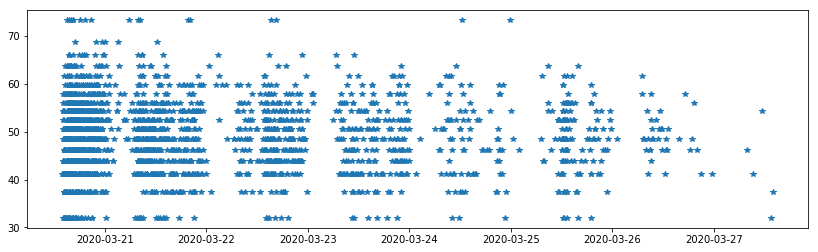

In [55]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(rawdata_wav1['Slaap_tot_T'], '*')

In [56]:
rawdata_wav1.columns

Index(['Include', 'reason', 'id', 'lastpage', 'startlanguage', 'startdate',
       'submitdate', 'duration', 'datestamp', 'IC', 'Leeftijd', 'Geslacht',
       'Geslacht_other', 'Beroep', 'Beroepssituatie', 'Beroepssituatie_other',
       'Werksector', 'Contact', 'Thuissamenstelling_SQ001',
       'Thuissamenstelling_SQ002', 'Thuissamenstelling_SQ003',
       'Thuissamenstelling_SQ004', 'Hulp', 'Scholingsgraad', 'Nationaliteit',
       'Verblijfplaats', 'Algemeen', 'Symptomen', 'Diagnose', 'Geschiedenis',
       'Risico', 'Bezorgdheid', 'Verspreiding', 'Quarantaine',
       'QuarantaineDuur', 'QuarantaineDuur2', 'QuarantaineInfo',
       'QuarantaineLevensmid', 'QuarantaineHulpmed', 'Hulpsoc',
       'richtlijnen_richtlijn1', 'richtlijnen_richtlijn2',
       'richtlijnen_richtlijn3', 'Gewoonte_Gewoonte1', 'Gewoonte_Gewoonte2',
       'Gewoonte_Gewoonte3', 'Determinanten_EigEff1', 'Determinanten_EigEff2',
       'Determinanten_EigEff3', 'Determinanten_UitkV1', 'Determinanten_UitkV2',
   

### Analysis

In [57]:
df4corr = rawdata_wav1[['Leeftijd', 'Bezorgdheid', 'Verspreiding', 'Angst_tot_T', 'Depressie_tot_T', 'Boosheid_tot_T', 
                        'Slaap_tot_T', 'SocFunc_tot_T']]

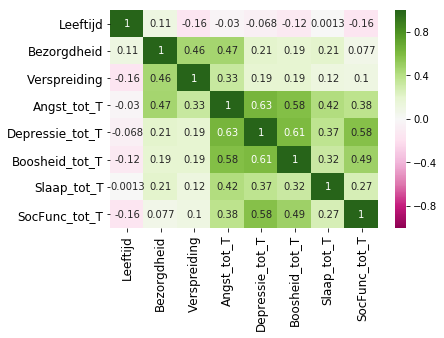

In [63]:
ax = sns.heatmap(df4corr.corr(method='pearson'), cmap='PiYG', annot=True, vmin=-1, vmax=1, )
ax.tick_params(labelsize='large')